# Library

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder, OrdinalEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Score
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score

# Class Imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# # Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint

# Saving
import joblib

# # Model Interpretation
from pdpbox.pdp import PDPIsolate

In [224]:
# 소수점 4자리까지 보이도록 설정
pd.set_option('display.float_format', '{:,.4f}'.format)

# EDA

## 데이터 불러오기

In [225]:
df = pd.read_csv('hr_data.csv')
df.shape

(14999, 10)

In [226]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.3800,0.5300,2,157,3,0,1,0,sales,low
1,0.8000,0.8600,5,262,6,0,1,0,sales,medium
2,0.1100,0.8800,7,272,4,0,1,0,sales,medium
3,0.7200,0.8700,5,223,5,0,1,0,sales,low
4,0.3700,0.5200,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.4000,0.5700,2,151,3,0,1,0,support,low
14995,0.3700,0.4800,2,160,3,0,1,0,support,low
14996,0.3700,0.5300,2,143,3,0,1,0,support,low
14997,0.1100,0.9600,6,280,4,0,1,0,support,low


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 결측치-중복치 처리

In [319]:
# 컬럼별 결측치수 확인
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [229]:
# 중복된 데이터수 확인
df.duplicated().sum()

3008

In [230]:
# 중복치 삭제 및 확인
df.drop_duplicates(inplace=True)

# 처리 결과 확인
duplicate_result = df.duplicated().sum()

if duplicate_result.sum() == 0:
  print("중복치가 모두 처리되었습니다")
else :
  print("중복치를 다시 확인하세요")

중복치가 모두 처리되었습니다


In [231]:
# index reset
df.reset_index(drop=True, inplace=True)
df.shape

(11991, 10)

## 데이터 파악

In [232]:
# 카디널리티 확인
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [233]:
# 범주형 변수값 확인

object_cols = ['number_project', 'sales', 'Work_accident', 'left', 'promotion_last_5years', 'salary']

for col in object_cols:
    print(f'col name : {col}')
    print(df[col].value_counts(normalize=True))
    print("--------------")

col name : number_project
number_project
4   0.3073
3   0.2936
5   0.1862
2   0.1319
6   0.0689
7   0.0121
Name: proportion, dtype: float64
--------------
col name : sales
sales
sales         0.2701
technical     0.1871
support       0.1519
IT            0.0814
RandD         0.0579
product_mng   0.0572
marketing     0.0561
accounting    0.0518
hr            0.0501
management    0.0364
Name: proportion, dtype: float64
--------------
col name : Work_accident
Work_accident
0   0.8457
1   0.1543
Name: proportion, dtype: float64
--------------
col name : left
left
0   0.8340
1   0.1660
Name: proportion, dtype: float64
--------------
col name : promotion_last_5years
promotion_last_5years
0   0.9831
1   0.0169
Name: proportion, dtype: float64
--------------
col name : salary
salary
low      0.4787
medium   0.4387
high     0.0826
Name: proportion, dtype: float64
--------------


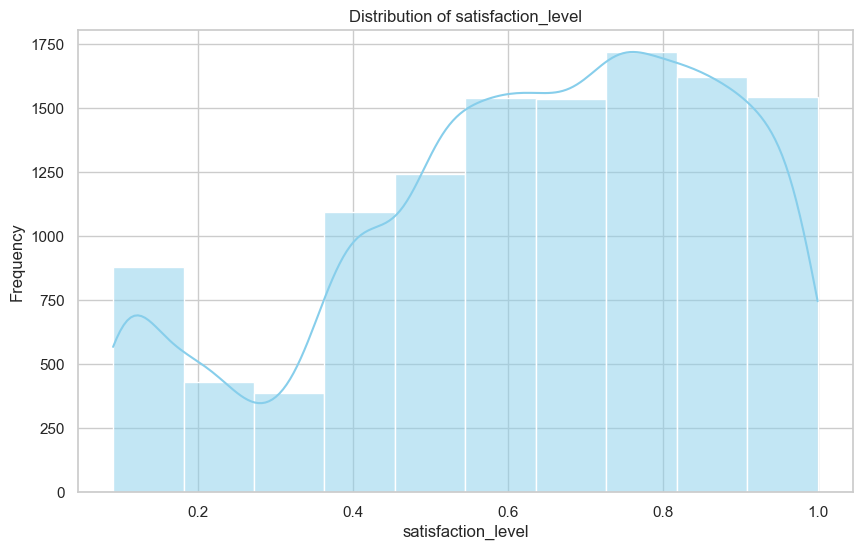

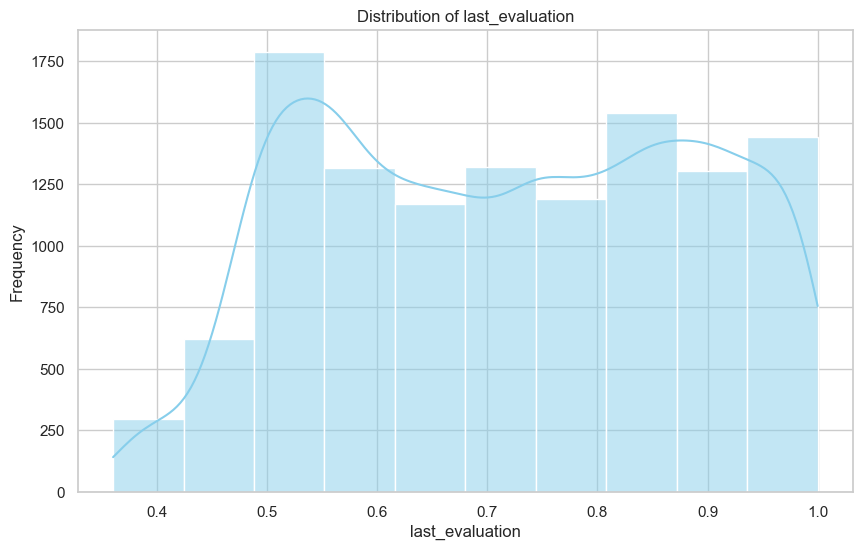

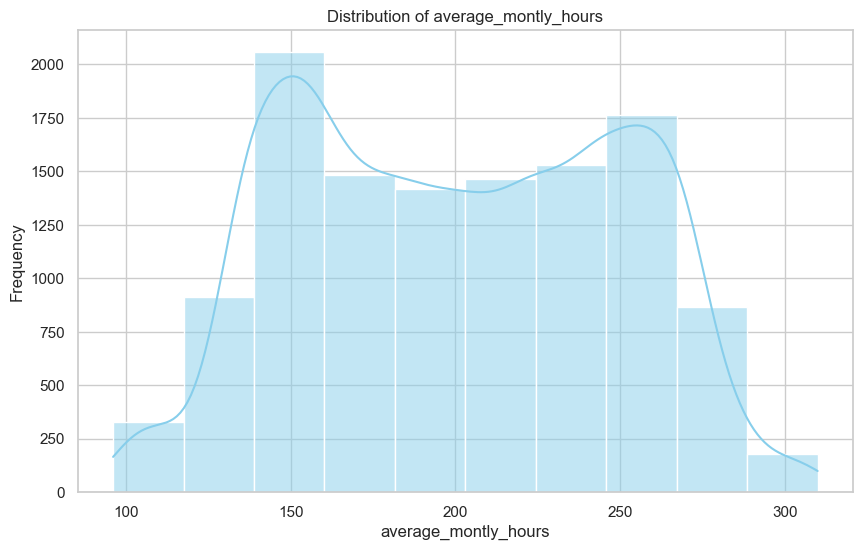

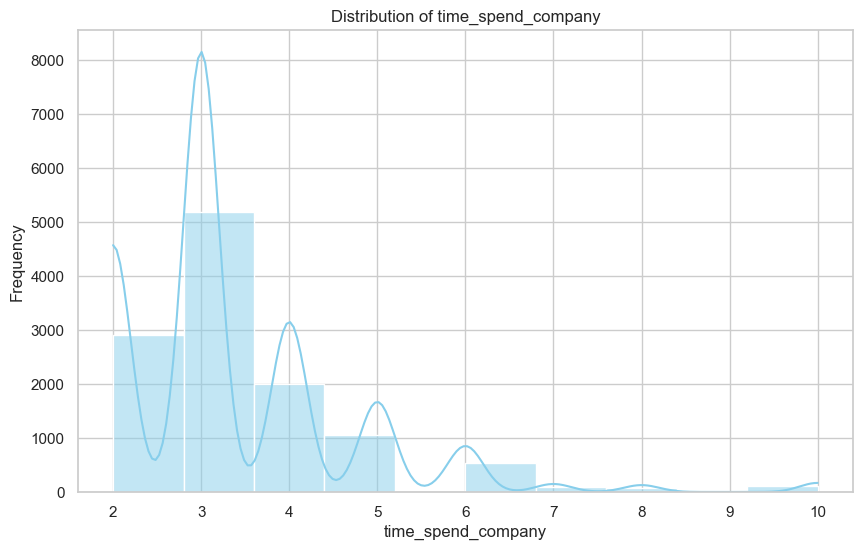

In [234]:
# 데이터 분포 확인

cols_to_visualize = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company' ]

for col in cols_to_visualize:

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## 특성 공학

In [235]:
# 컬럼명 수정

df_eda = df.copy()

df_eda.rename(columns={'Work_accident': 'work_accident'}, inplace=True)
df_eda.rename(columns={'sales': 'department'}, inplace=True)
df_eda.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

In [236]:
# salary Ordinal Encoding

salary_map = {'low':1, 'medium':2, 'high':3}
df_eda['salary'] = df_eda['salary'].map(salary_map)

In [237]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 936.9+ KB


In [238]:
# 확인
df_eda

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.3800,0.5300,2,157,3,0,1,0,sales,1
1,0.8000,0.8600,5,262,6,0,1,0,sales,2
2,0.1100,0.8800,7,272,4,0,1,0,sales,2
3,0.7200,0.8700,5,223,5,0,1,0,sales,1
4,0.3700,0.5200,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11986,0.9000,0.5500,3,259,10,1,0,1,management,3
11987,0.7400,0.9500,5,266,10,0,0,1,management,3
11988,0.8500,0.5400,3,185,10,0,0,1,management,3
11989,0.3300,0.6500,3,172,10,0,0,1,marketing,3


## 이상치 처리

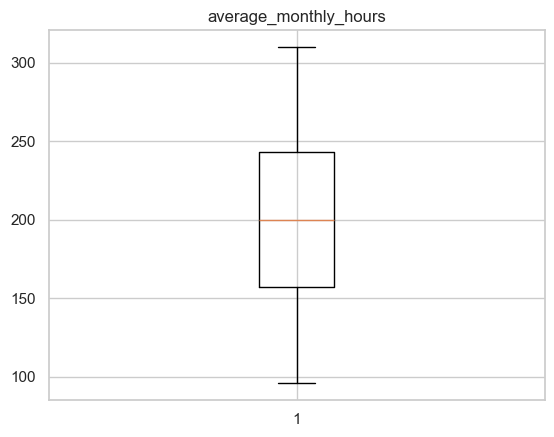

In [239]:
# 분포 확인

outlier_check = ['average_monthly_hours']

for i, col in zip(range(len(outlier_check)), outlier_check):
    plt.figure(i)
    plt.boxplot(df_eda[col])
    plt.title(col)
    plt.show

# 이상치는 따로 없는 것으로 파악

In [240]:
# eda 끝난 데이터프레임 저장
df_eda.to_csv('hr_data_cleaned.csv', index=False)


# Analysis

In [241]:
df_alaysis = df_eda.copy()

# 분석을 위한 새로운 컬럼 생성

df_alaysis['sal_eval_rate'] = df_eda['salary'] / df_eda['last_evaluation']
df_alaysis['sal_time_rate'] = df_eda['salary'] / df_eda['time_spend_company']
df_alaysis['sal_hours_rate'] = df_eda['salary'] / df_eda['average_monthly_hours']
df_alaysis['sal_project_rate'] = df_eda['salary'] / df_eda['number_project']

In [242]:
df_without_department = df_alaysis.drop(columns=['department'])
df_grouped = df_without_department.groupby('left').mean()
df_grouped

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,sal_eval_rate,sal_time_rate,sal_hours_rate,sal_project_rate
left,,,,,,,,,,,,
0,0.6674,0.7157,3.7868,198.9427,3.2620,0.1745,0.0195,1.6376,2.4237,0.5665,0.0087,0.4649
1,0.4403,0.7218,3.8835,208.1622,3.8815,0.0527,0.0040,1.4345,2.1564,0.3930,0.0075,0.4688


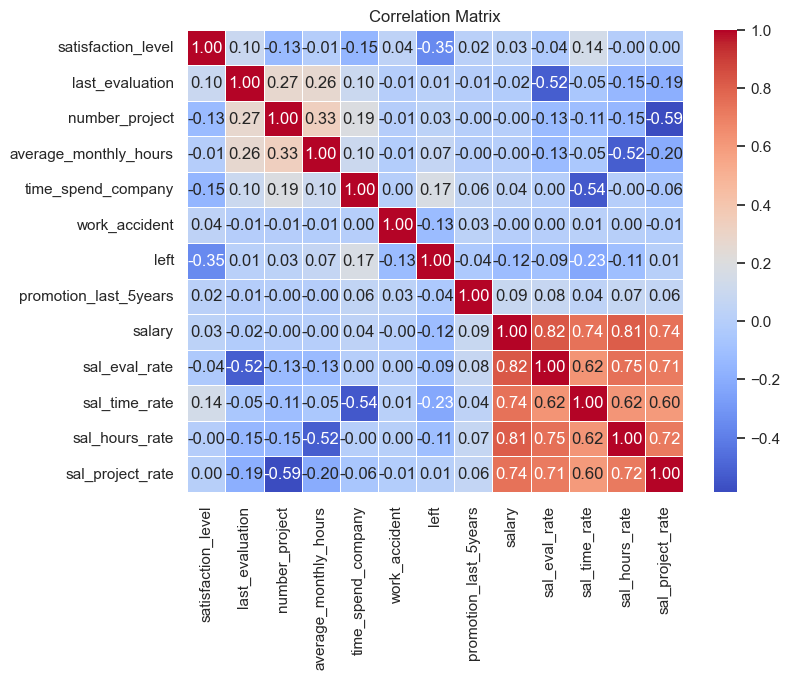

In [243]:
# 히트맵으로 상관관계 시각화

correlation_matrix = df_without_department.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

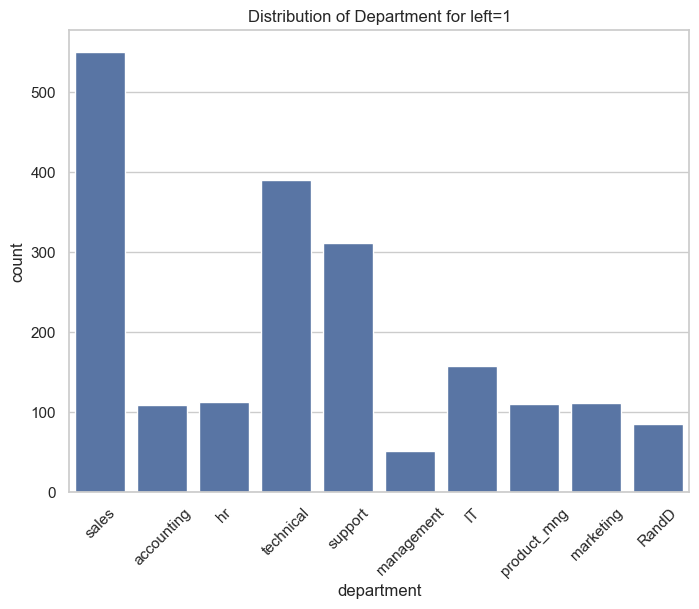

In [244]:
# 'left' 값이 1인 행들만 선택
df_left_1 = df_eda[df_eda['left'] == 1]

# 'department' 컬럼의 분포를 그리기
plt.figure(figsize=(8, 6))
sns.countplot(x='department', data=df_left_1)
plt.title('Distribution of Department for left=1')
plt.xticks(rotation=45)
plt.show()

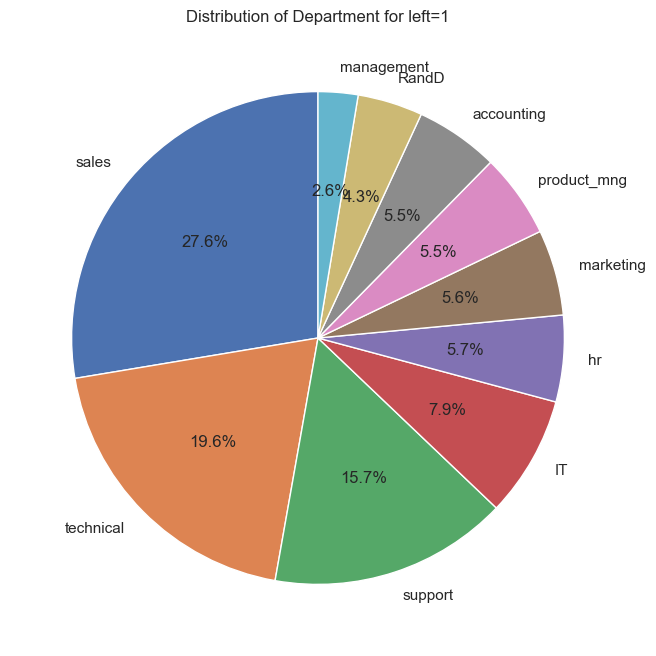

In [245]:
# 'department' 컬럼의 값들에 대한 카운트 계산
department_counts = df_left_1['department'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Department for left=1')
plt.show()

In [246]:
df_department_grouped = df_left_1.groupby('department').mean()
df_department_grouped

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,0.4171,0.7158,3.9304,209.5380,3.8354,0.0443,1.0000,0.0127,1.4747
RandD,0.4335,0.7465,4.0471,212.7412,4.0000,0.0824,1.0000,0.0000,1.4353
accounting,0.4147,0.7140,3.9541,209.5413,3.8716,0.0459,1.0000,0.0000,1.4862
hr,0.4225,0.6787,3.5398,197.0531,3.7080,0.0442,1.0000,0.0000,1.4779
management,0.4360,0.7231,4.0769,207.6154,3.7308,0.0769,1.0000,0.0192,1.4038
marketing,0.4544,0.6976,3.6607,202.1429,3.8839,0.0357,1.0000,0.0000,1.3482
product_mng,0.4679,0.7190,3.8000,205.9727,3.9364,0.0455,1.0000,0.0000,1.5000
sales,0.4504,0.7162,3.7636,206.2709,3.8200,0.0564,1.0000,0.0055,1.4418
support,0.4515,0.7373,3.9679,208.1026,3.9583,0.0577,1.0000,0.0032,1.4038


# Modeling

## 전처리

### 데이터셋 분리 (train / val / test)

In [247]:
# target / feature 분리

target = 'left'
x = df_eda.drop(target, axis=1)
y = df_eda[target]

print(f'x shape : {x.shape}')
print(f'y shape : {y.shape}')

x shape : (11991, 9)
y shape : (11991,)


In [248]:
## 데이터셋 분리 (train / val / test)# train / val / test 분리

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(f'train data : x{x_train.shape}, y{y_train.shape}')
print(f'test data : x{x_test.shape}, y{y_test.shape}')

train data : x(9592, 9), y(9592,)
test data : x(2399, 9), y(2399,)


### target 비율 확인

In [249]:
y.value_counts(normalize=True)

left
0   0.8340
1   0.1660
Name: proportion, dtype: float64

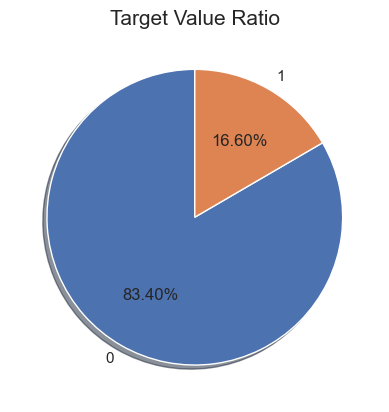

In [250]:
zero_label = y.value_counts(normalize=True)[0]
one_label = y.value_counts(normalize=True)[1]

plt.pie(
    (zero_label, one_label),
    labels=(0, 1),
    autopct="%.2f%%",
    shadow=True,
    startangle=90,
)
plt.title("Target Value Ratio", size=15)
plt.show()

## Model 선택

In [271]:
def eval_models(y_true, y_pred) :
    accuracy = accuracy_score(y_true, y_pred)
    recall_class0 = recall_score(y_true, y_pred, average=None)[0]
    recall_class1 = recall_score(y_true, y_pred, average=None)[1]

    return accuracy, recall_class0, recall_class1

In [272]:
def train_test_score(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_eval = pd.DataFrame(index=['Accuracy', 'Recall_Class0', 'Recall_Class1'], columns=['Train', 'Test'])
    model_eval['Train'] = eval_models(y_train, y_train_pred)
    model_eval['Test'] = eval_models(y_test, y_test_pred)

    display(model_eval)
    return model_eval

In [273]:
# 기준모델
base = y_train.mode()[0]
baseline = [base] * len(y_train)

# 평가
acc, f0, f1 = eval_models(y_train, baseline)
print(f"accuracy : {acc}")
print(f'recall : class0 - {f0}, class1 - {f1}')

# 모델별 score
eval_table = pd.DataFrame(index=['Accuracy', 'Recall_Class0', 'Recall_Class1'],
                          columns=['Baseline', 'Logistic', 'KNN', 'naivebayes', 'DecisionTree', 'RandomForest', 'XGB'])
eval_table['Baseline'] = eval_models(y_train, baseline)
eval_table

accuracy : 0.8355921601334445
recall : class0 - 1.0, class1 - 0.0


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,NaN,NaN,NaN,NaN,NaN,NaN
Recall_Class0,1.0000,NaN,NaN,NaN,NaN,NaN,NaN
Recall_Class1,0.0000,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
# LogisticRegression

logistic = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LogisticRegression(random_state = 1))

logistic.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['department'])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [275]:
# train-val score
train_test_score(logistic)

# 모델별 score
y_test_pred = logistic.predict(x_test)
eval_table['Logistic'] = eval_models(y_test, y_test_pred)
eval_table

,Train,Test
Accuracy,0.8322,0.8249
Recall_Class0,0.9595,0.9567
Recall_Class1,0.1852,0.1932


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,0.8249,NaN,NaN,NaN,NaN,NaN
Recall_Class0,1.0000,0.9567,NaN,NaN,NaN,NaN,NaN
Recall_Class1,0.0000,0.1932,NaN,NaN,NaN,NaN,NaN


In [276]:
# KNN

knn = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))

knn.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['department'],
                                mapping=[{'col': 'department',
                                          'data_type': dtype('O'),
                                          'mapping': sales           1
IT              2
support         3
technical       4
hr              5
product_mng     6
RandD           7
marketing       8
management      9
accounting     10
NaN            -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [277]:
# train-val score
train_test_score(knn)

# 모델별 score
y_test_pred = knn.predict(x_test)
eval_table['KNN'] = eval_models(y_test, y_test_pred)
eval_table

,Train,Test
Accuracy,0.9720,0.9562
Recall_Class0,0.9837,0.9668
Recall_Class1,0.9125,0.9058


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,0.8249,0.9562,NaN,NaN,NaN,NaN
Recall_Class0,1.0000,0.9567,0.9668,NaN,NaN,NaN,NaN
Recall_Class1,0.0000,0.1932,0.9058,NaN,NaN,NaN,NaN


In [278]:
# naivebayes

nb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GaussianNB())

nb.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['department'],
                                mapping=[{'col': 'department',
                                          'data_type': dtype('O'),
                                          'mapping': sales           1
IT              2
support         3
technical       4
hr              5
product_mng     6
RandD           7
marketing       8
management      9
accounting     10
NaN            -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [279]:
# train-val score
train_test_score(nb)

# 모델별 score
y_test_pred = nb.predict(x_test)
eval_table['naivebayes'] = eval_models(y_test, y_test_pred)
eval_table

,Train,Test
Accuracy,0.8465,0.8253
Recall_Class0,0.8781,0.8670
Recall_Class1,0.6861,0.6256


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,0.8249,0.9562,0.8253,NaN,NaN,NaN
Recall_Class0,1.0000,0.9567,0.9668,0.8670,NaN,NaN,NaN
Recall_Class1,0.0000,0.1932,0.9058,0.6256,NaN,NaN,NaN


In [280]:
# DecisionTreeClassifier

decisiontree = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state = 1))

decisiontree.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['department'],
                                mapping=[{'col': 'department',
                                          'data_type': dtype('O'),
                                          'mapping': sales           1
IT              2
support         3
technical       4
hr              5
product_mng     6
RandD           7
marketing       8
management      9
accounting     10
NaN            -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [281]:
# train-val score
train_test_score(decisiontree)

# 모델별 score
y_test_pred = decisiontree.predict(x_test)
eval_table['DecisionTree'] = eval_models(y_test, y_test_pred)
eval_table

,Train,Test
Accuracy,1.0000,0.9742
Recall_Class0,1.0000,0.9854
Recall_Class1,1.0000,0.9203


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,0.8249,0.9562,0.8253,0.9742,NaN,NaN
Recall_Class0,1.0000,0.9567,0.9668,0.8670,0.9854,NaN,NaN
Recall_Class1,0.0000,0.1932,0.9058,0.6256,0.9203,NaN,NaN


In [282]:
# RandomForestClassifier

randomforest = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state = 1))

randomforest.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['department'],
                                mapping=[{'col': 'department',
                                          'data_type': dtype('O'),
                                          'mapping': sales           1
IT              2
support         3
technical       4
hr              5
product_mng     6
RandD           7
marketing       8
management      9
accounting     10
NaN            -2
dtype: int64}])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1))])

In [283]:
# train-val score
train_test_score(randomforest)

# 모델별 score
y_test_pred = randomforest.predict(x_test)
eval_table['RandomForest'] = eval_models(y_test, y_test_pred)
eval_table

,Train,Test
Accuracy,1.0000,0.9846
Recall_Class0,1.0000,0.9980
Recall_Class1,1.0000,0.9203


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,0.8249,0.9562,0.8253,0.9742,0.9846,NaN
Recall_Class0,1.0000,0.9567,0.9668,0.8670,0.9854,0.9980,NaN
Recall_Class1,0.0000,0.1932,0.9058,0.6256,0.9203,0.9203,NaN


In [284]:
xgb = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(random_state = 1))

xgb.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['department'],
                                mapping=[{'col': 'department',
                                          'data_type': dtype('O'),
                                          'mapping': sales           1
IT              2
support         3
technical       4
hr              5
product_mng     6
RandD           7
marketing       8
management      9
accounting     10
NaN            -2
dtype: int64}])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [285]:
# train-val score
train_test_score(xgb)

# 모델별 score
y_test_pred = xgb.predict(x_test)
eval_table['XGB'] = eval_models(y_test, y_test_pred)
eval_table

,Train,Test
Accuracy,0.9969,0.9825
Recall_Class0,0.9993,0.9950
Recall_Class1,0.9848,0.9227


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.8356,0.8249,0.9562,0.8253,0.9742,0.9846,0.9825
Recall_Class0,1.0000,0.9567,0.9668,0.8670,0.9854,0.9980,0.9950
Recall_Class1,0.0000,0.1932,0.9058,0.6256,0.9203,0.9203,0.9227


In [286]:
# RandomForest 예측을 수행합니다.
y_test_pred = randomforest.predict(x_test)

# classification_report를 출력합니다.
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1985
           1       0.99      0.92      0.95       414

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [287]:
# XGBoost 예측을 수행합니다.
y_test_pred = xgb.predict(x_test)

# classification_report를 출력합니다.
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1985
           1       0.97      0.92      0.95       414

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



## Class Imbalance 해결

In [288]:
ore = OrdinalEncoder()
x_train_ore = ore.fit_transform(x_train)
x_test_ore = ore.transform(x_test)

In [ ]:
# 인코더 저장
joblib.dump(ore, 'ordinal_encoder.joblib')

In [318]:
# 인코딩 매핑 정보 출력
ore.mapping

[{'col': 'department',
  'mapping': sales           1
  IT              2
  support         3
  technical       4
  hr              5
  product_mng     6
  RandD           7
  marketing       8
  management      9
  accounting     10
  NaN            -2
  dtype: int64,
  'data_type': dtype('O')}]

In [289]:
# RandomUnderSampler
u_sampler = RandomUnderSampler(random_state=1) # sampler 불러오기
x_train_u, y_train_u = u_sampler.fit_resample(x_train_ore, y_train) #fit

# RandomOverSampler
o_sampler = RandomOverSampler(random_state=1)
x_train_o, y_train_o = o_sampler.fit_resample(x_train_ore, y_train)

# SMOTE
smote = SMOTE(random_state=1)
x_train_s, y_train_s = smote.fit_resample(x_train_ore, y_train)

In [290]:
def sampling_score(model):

    print(f'MODEL : {model}')

    x_samples = [x_train_u, x_train_o, x_train_s]
    y_samples = [y_train_u, y_train_o, y_train_s]
    sample_eval = pd.DataFrame(index=['Accuracy', 'Recall_Class0', 'Recall_Class1'], columns=['Under', 'Over', 'SMOTE'])

    for i, x, y in zip(range(3), x_samples, y_samples):
        model.fit(x, y)
        y_test_pred = model.predict(x_test_ore)

        sample_eval[sample_eval.columns[i]] = eval_models(y_test, y_test_pred)

    display(sample_eval)
    return sample_eval

In [291]:
sampling_score(randomforest[1])
sampling_score(xgb[1])

MODEL : RandomForestClassifier(random_state=1)


,Under,Over,SMOTE
Accuracy,0.9742,0.9833,0.9746
Recall_Class0,0.9854,0.9965,0.9849
Recall_Class1,0.9203,0.9203,0.9251


MODEL : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)


,Under,Over,SMOTE
Accuracy,0.9558,0.9767,0.9679
Recall_Class0,0.9607,0.9879,0.9773
Recall_Class1,0.9324,0.9227,0.9227


,Under,Over,SMOTE
Accuracy,0.9558,0.9767,0.9679
Recall_Class0,0.9607,0.9879,0.9773
Recall_Class1,0.9324,0.9227,0.9227


In [292]:
y_train_u.value_counts(normalize=True)

left
0   0.5000
1   0.5000
Name: proportion, dtype: float64

## Tuning

In [296]:
#초기화
xgb_model = XGBClassifier(random_state=1)

# 튜닝할 하이퍼파라미터 공간을 정의합니다.
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# GridSearchCV를 설정합니다.
grid_search = GridSearchCV(
    xgb_model,
    param_grid=param_grid,
    scoring='recall',  # 평가 지표
    cv=3,  # 교차 검증 횟수
    verbose=1,
    n_jobs=-1  # 병렬 처리를 위해 사용 가능한 CPU 코어 수
)

# 랜덤 서치를 수행합니다.
grid_search.fit(x_train_u, y_train_u)

# 최적의 하이퍼파라미터를 출력합니다.
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델을 얻습니다.
best_model_grid = grid_search.best_estimator_

# 테스트 세트에서 모델을 평가합니다.
accuracy = best_model_grid.score(x_test_ore, y_test)
print("테스트 세트 정확도:", accuracy)



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}
테스트 세트 정확도: 0.8795331388078366


In [297]:
y_test_pred = best_model_grid.predict(x_test_ore)
eval_models(y_test, y_test_pred)

(0.8795331388078366, 0.8670025188916877, 0.9396135265700483)

In [298]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#초기화
pca = PCA()
xgb_model = XGBClassifier(random_state=1)

model = Pipeline(steps=[('pca', pca), ('xgb_model', xgb_model)])

# 튜닝할 하이퍼파라미터 공간을 정의합니다.
param_grid = {
    'pca__n_components': [1,2,3,4,5,6],
}

# GridSearchCV를 설정합니다.
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    scoring='recall',  # 평가 지표
    cv=3,  # 교차 검증 횟수
    verbose=1,
    n_jobs=-1  # 병렬 처리를 위해 사용 가능한 CPU 코어 수
    random_seed = 1
)

# 랜덤 서치를 수행합니다.
grid_search.fit(x_train_o, y_train_o)

# 최적의 하이퍼파라미터를 출력합니다.
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델을 얻습니다.
best_model_pca = grid_search.best_estimator_

# 테스트 세트에서 모델을 평가합니다.
accuracy = best_model_pca.score(x_test_ore, y_test)
print("테스트 세트 정확도:", accuracy)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
최적의 하이퍼파라미터: {'pca__n_components': 6}
테스트 세트 정확도: 0.9641517298874531


In [299]:
y_test_pred = best_model_pca.predict(x_test_ore)
eval_models(y_test, y_test_pred)

(0.9641517298874531, 0.9763224181360202, 0.9057971014492754)

In [300]:
# 예측을 수행합니다.
y_test_pred = best_model_grid.predict(x_test_ore)

# classification_report를 출력합니다.
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1985
           1       0.60      0.94      0.73       414

    accuracy                           0.88      2399
   macro avg       0.79      0.90      0.83      2399
weighted avg       0.92      0.88      0.89      2399



In [301]:
# 모델 저장
import joblib

# best_model_grid을 저장
joblib.dump(best_model_grid, 'xgboost_model.pkl')

['xgboost_model.pkl']

# 모델 해석 및 수정

## Permutation Importance

In [303]:
from sklearn.inspection import permutation_importance

# Permutation Importance 계산
result = permutation_importance(best_model_grid, x_test_ore, y_test, n_repeats=10, random_state=1)

# 특성 중요도 출력
feature_importance = result.importances_mean
feature_names = x_test.columns

# 중요도가 높은 순서대로 출력
indices = feature_importance.argsort()[::-1]
for idx in indices:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

satisfaction_level: 0.1506
time_spend_company: 0.0748
average_monthly_hours: 0.0079
last_evaluation: 0.0050
salary: 0.0000
department: 0.0000
promotion_last_5years: 0.0000
work_accident: 0.0000
number_project: -0.0012


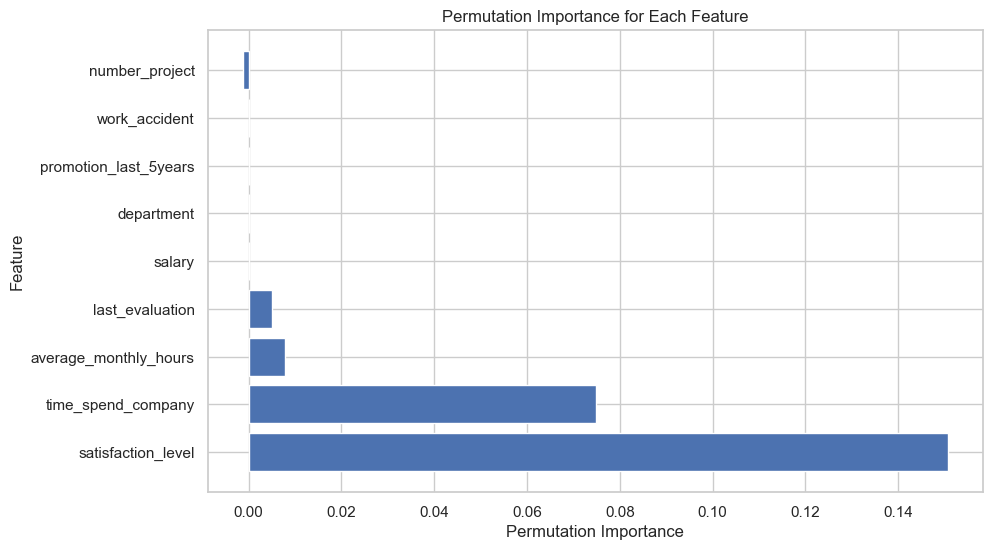

In [304]:
# 시각화

# 중요도가 높은 순서대로 정렬
indices = feature_importance.argsort()[::-1]

# 가로 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.ylabel("Feature")
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance for Each Feature")
plt.show()

In [305]:
# Permutation Importance가 음수인 컬럼 삭제

def low_permutation(x):
    low_permu_list = ['number_project']
    x_new = x.drop(columns = low_permu_list)

    return x_new

x_train_new = low_permutation(x_train_ore)
x_test_new = low_permutation(x_test_ore)

print(f'train data : x{x_train_new.shape}, y{y_train.shape}')
print(f'test data : x{x_test_new.shape}, y{y_test.shape}')

train data : x(9592, 8), y(9592,)
test data : x(2399, 8), y(2399,)


In [306]:
# RandomUnderSampler
u_sampler = RandomUnderSampler(random_state=1) # sampler 불러오기
x_train_u, y_train_u = u_sampler.fit_resample(x_train_new, y_train) #fit

# RandomOverSampler
o_sampler = RandomOverSampler(random_state=1)
x_train_o, y_train_o = o_sampler.fit_resample(x_train_new, y_train)

# SMOTE
smote = SMOTE(random_state=1)
x_train_s, y_train_s = smote.fit_resample(x_train_new, y_train)

In [309]:
def sampling_score(model):

    print(f'MODEL : {model}')

    x_samples = [x_train_u, x_train_o, x_train_s]
    y_samples = [y_train_u, y_train_o, y_train_s]
    sample_eval = pd.DataFrame(index=['Accuracy', 'Recall_Class0', 'Recall_Class1'], columns=['Under', 'Over', 'SMOTE'])

    for i, x, y in zip(range(3), x_samples, y_samples):
        model.fit(x, y)
        y_test_pred = model.predict(x_test_new)

        sample_eval[sample_eval.columns[i]] = eval_models(y_test, y_test_pred)

    display(sample_eval)
    return sample_eval

In [310]:
sampling_score(randomforest[1])
sampling_score(xgb[1])

MODEL : RandomForestClassifier(random_state=1)


,Under,Over,SMOTE
Accuracy,0.9671,0.9800,0.9633
Recall_Class0,0.9768,0.9935,0.9718
Recall_Class1,0.9203,0.9155,0.9227


MODEL : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)


,Under,Over,SMOTE
Accuracy,0.9512,0.9746,0.9621
Recall_Class0,0.9547,0.9859,0.9698
Recall_Class1,0.9348,0.9203,0.9251


,Under,Over,SMOTE
Accuracy,0.9512,0.9746,0.9621
Recall_Class0,0.9547,0.9859,0.9698
Recall_Class1,0.9348,0.9203,0.9251


In [312]:
#초기화
xgb_model = XGBClassifier(random_state=1)

# 튜닝할 하이퍼파라미터 공간을 정의합니다.
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# GridSearchCV를 설정합니다.
grid_search = GridSearchCV(
    xgb_model,
    param_grid=param_grid,
    scoring='recall',  # 평가 지표
    cv=3,  # 교차 검증 횟수
    verbose=1,
    n_jobs=-1,  # 병렬 처리를 위해 사용 가능한 CPU 코어 수
    random_seed = 1
)

# 랜덤 서치를 수행합니다.
grid_search.fit(x_train_u, y_train_u)

# 최적의 하이퍼파라미터를 출력합니다.
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델을 얻습니다.
best_model_grid_new = grid_search.best_estimator_

# 테스트 세트에서 모델을 평가합니다.
accuracy = best_model_grid_new.score(x_test_new, y_test)
print("테스트 세트 정확도:", accuracy)



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
테스트 세트 정확도: 0.8720300125052105


In [316]:
# 예측을 수행합니다.
y_test_pred = best_model_grid_new.predict(x_test_new)
eval_models(y_test, y_test_pred)

(0.8720300125052105, 0.856926952141058, 0.9444444444444444)

In [329]:
# best_model_grid을 저장
joblib.dump(best_model_grid_new, 'xgboost_model.pkl')

['xgboost_model.pkl']

## PDP

In [161]:
x_test

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,sal_eval_rate,sal_time_rate,sal_hours_rate,sal_project_rate
3618,0.1800,0.7000,5,182,4,0,0,technical,1,1.4286,0.2500,0.0055,0.2000
8758,0.8900,0.9000,3,231,3,0,0,IT,2,2.2222,0.6667,0.0087,0.6667
7477,0.8100,0.9200,3,136,3,0,0,marketing,2,2.1739,0.6667,0.0147,0.6667
6971,0.6600,0.9800,4,225,2,1,0,hr,2,2.0408,1.0000,0.0089,0.5000
4793,0.9500,0.5300,4,263,3,0,0,IT,1,1.8868,0.3333,0.0038,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,0.5600,0.7700,5,238,4,0,0,technical,2,2.5974,0.5000,0.0084,0.4000
3158,0.8600,0.5500,5,219,2,0,0,technical,2,3.6364,1.0000,0.0091,0.4000
43,0.1000,0.8000,7,281,4,0,0,technical,1,1.2500,0.2500,0.0036,0.1429
8732,0.5000,0.6700,2,142,3,0,0,technical,1,1.4925,0.3333,0.0070,0.5000


In [164]:
x_test_ore

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,sal_eval_rate,sal_time_rate,sal_hours_rate,sal_project_rate,x
3618,0.1800,0.7000,5,182,4,0,0,4,1,1.4286,0.2500,0.0055,0.2000,0.0000
8758,0.8900,0.9000,3,231,3,0,0,2,2,2.2222,0.6667,0.0087,0.6667,7.0000
7477,0.8100,0.9200,3,136,3,0,0,8,2,2.1739,0.6667,0.0147,0.6667,6.0000
6971,0.6600,0.9800,4,225,2,1,0,5,2,2.0408,1.0000,0.0089,0.5000,4.0000
4793,0.9500,0.5300,4,263,3,0,0,2,1,1.8868,0.3333,0.0038,0.2500,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,0.5600,0.7700,5,238,4,0,0,4,2,2.5974,0.5000,0.0084,0.4000,3.0000
3158,0.8600,0.5500,5,219,2,0,0,4,2,3.6364,1.0000,0.0091,0.4000,7.0000
43,0.1000,0.8000,7,281,4,0,0,4,1,1.2500,0.2500,0.0036,0.1429,0.0000
8732,0.5000,0.6700,2,142,3,0,0,4,1,1.4925,0.3333,0.0070,0.5000,2.0000


In [170]:
from pdpbox import pdp

# 등록기간에 따른 신용도 변화
feature = 'satisfaction_level'
features = x_test.columns
pdp_dist = pdp.PDPIsolate(model=best_model_grid, df=x_test_ore, feature=feature, feature_name=features, model_features=x_test.columns)

# matplotlib을 사용하여 시각화
pdp_dist.plot()

obtain pred_func from the provided model.


100%|██████████| 10/10 [00:00<00:00, 196.08it/s]


(Figure({
     'data': [{'hoverinfo': 'none',
               'line': {'color': 'rgba(227,238,248,0.8)'},
               'mode': 'lines',
               'type': 'scatter',
               'x': array([0.09      , 0.28      , 0.44      , 0.54      , 0.62      , 0.7       ,
                           0.77666667, 0.84      , 0.91      , 1.        ]),
               'xaxis': 'x',
               'y': array([ 0.        , -0.6396638 , -0.46067658, -0.69761896, -0.65697695,
                           -0.58315244, -0.55074751, -0.5609535 , -0.57252944, -0.68052514]),
               'yaxis': 'y'},
              {'fill': 'tonexty',
               'fillcolor': 'rgba(227,238,248,0.8)',
               'hoverinfo': 'none',
               'line': {'color': 'rgba(227,238,248,0.8)'},
               'mode': 'lines',
               'type': 'scatter',
               'x': array([0.09      , 0.28      , 0.44      , 0.54      , 0.62      , 0.7       ,
                           0.77666667, 0.84      , 0.91      

(<Figure size 1500x1500 with 7 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': [{'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='family_type (class 0)'>},
   {'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='family_type (class 1)'>},
   {'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='family_type (class 2)'>}]})

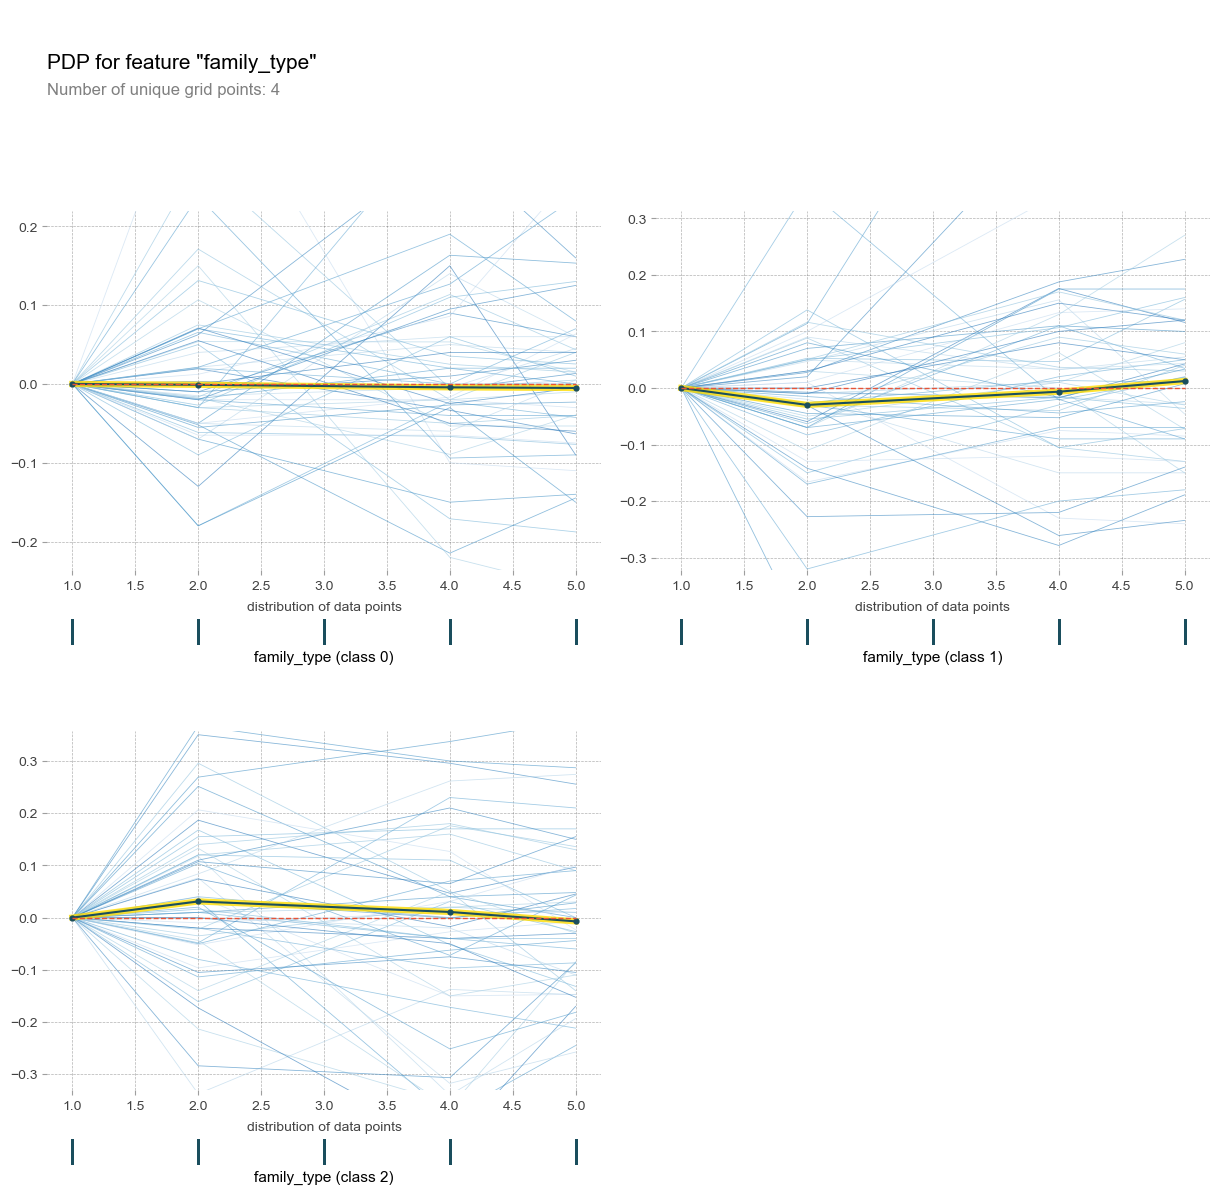

In [ ]:
# 가족 구성에 따른 신용도 변화

target_feature = 'family_type'

isolated = pdp_isolate(
    model=model2,
    dataset=x_test_new_ore,
    model_features=x_test_new_ore.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)

In [ ]:
ore.mapping

[{'col': 'family_type',
  'mapping': Civil marriage          1
  Married                 2
  Separated               3
  Single / not married    4
  Widow                   5
  NaN                    -2
  dtype: int64,
  'data_type': dtype('O')}]

(<Figure size 1500x1500 with 7 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': [{'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='income_total (class 0)'>},
   {'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='income_total (class 1)'>},
   {'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='income_total (class 2)'>}]})

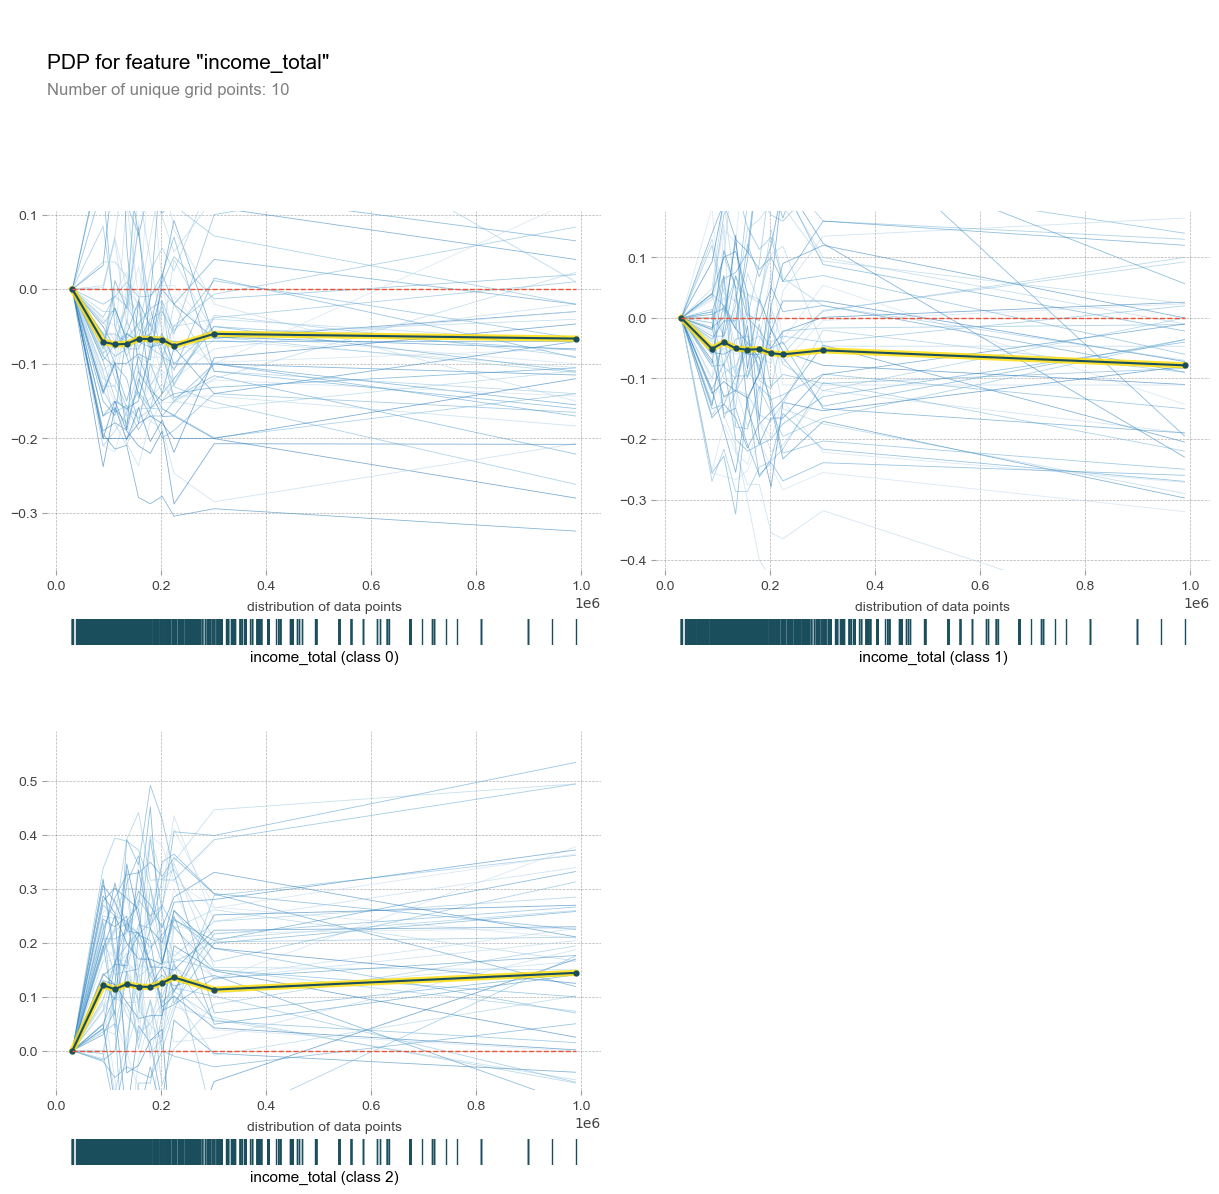

In [ ]:
# 수입에 따른 신용도 변화

target_feature = 'income_total'

isolated = pdp_isolate(
    model=model2,
    dataset=x_test_new_ore,
    model_features=x_test_new_ore.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)

(<Figure size 1500x1500 with 7 Axes>,
 {'title_ax': <Axes: >,
  'pdp_ax': [{'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='age (class 0)'>},
   {'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='age (class 1)'>},
   {'_pdp_ax': <Axes: >,
    '_count_ax': <Axes: title={'center': 'distribution of data points'}, xlabel='age (class 2)'>}]})

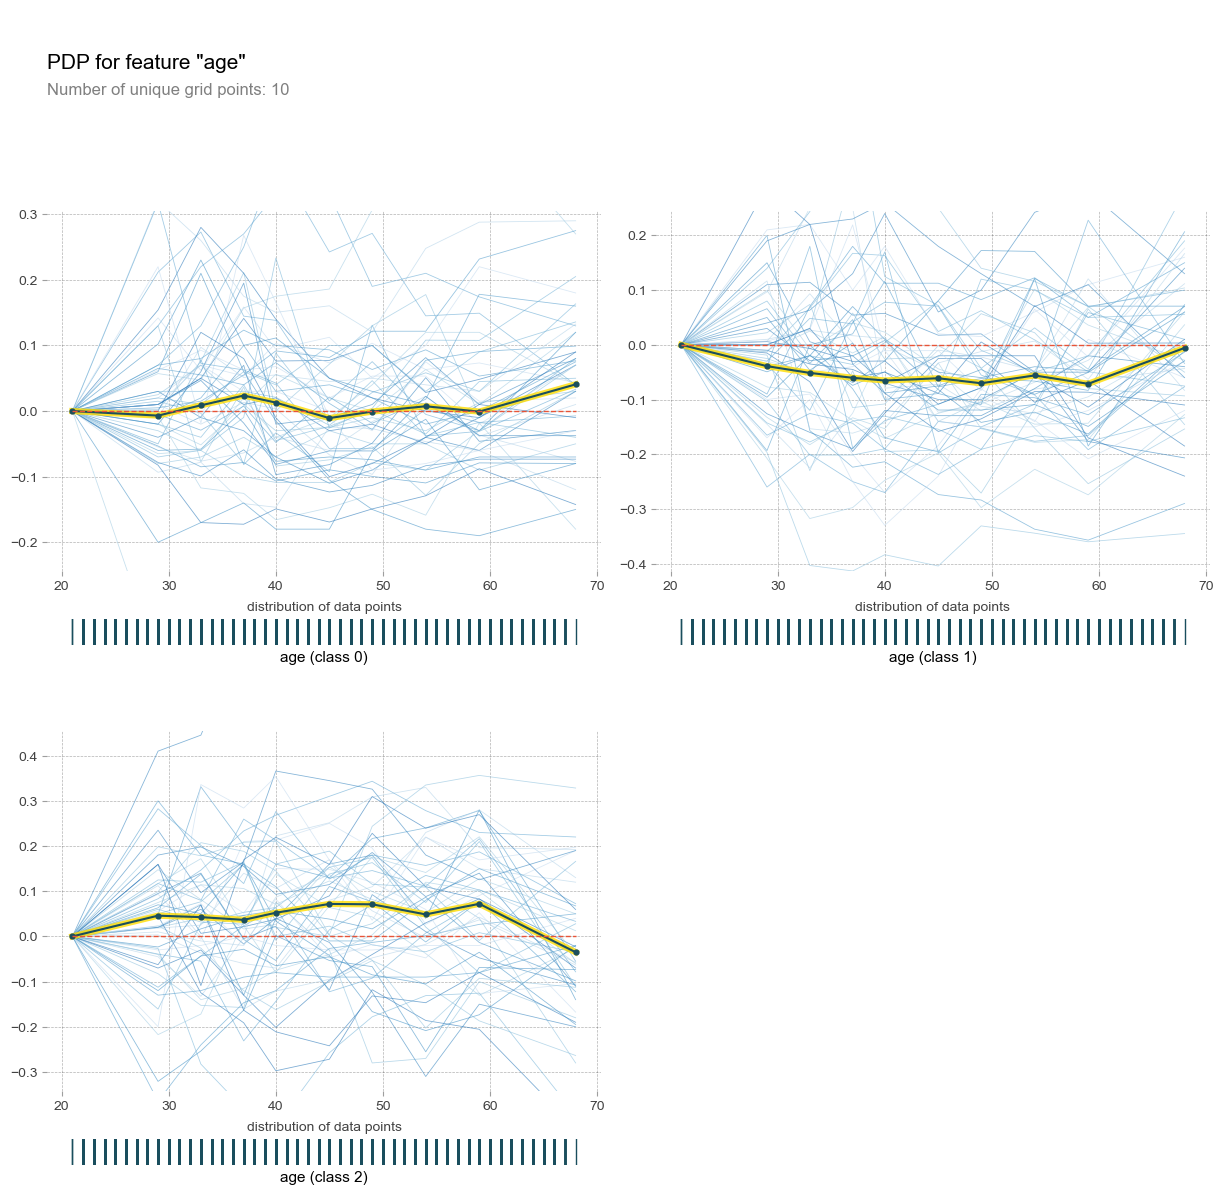

In [ ]:
# 나이에 따른 신용도 변화

target_feature = 'age'

isolated = pdp_isolate(
    model=model2,
    dataset=x_test_new_ore,
    model_features=x_test_new_ore.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # 전체 데이터 갯수 중 plotting할 데이터 수의 비율
    plot_pts_dist=True,
)